In [54]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

import tensorflow as tf


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [55]:
df_spectra=pd.read_csv("spectrum_energy_input_numberOfPeaks.csv",index_col=[0])
x_data=np.asarray([df_spectra["no_of_max"].values]).transpose()
x_data_max=max(x_data)
x_data=x_data/x_data_max
#x_data=np.asarray([df_spectra[["no_of_max","Energy_highest_max_normalized"]].to_numpy()])[0]

y_data=np.asarray([df_spectra[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]
df_spectra.head(-50)


,main_maximum,all_maxima,no_of_max,k6a1,k6a2,k11,k12,k9a1,k9a2,Energy_highest_max_normalized,Energy_all_max_normalized
0,0.748,[-0.758 -0.69 -0.612 -0.472 -0.406 -0.328 -0....,18,0.25,0.25,0.25,0.25,0.25,0.25,0.874,[0.121 0.155 0.194 0.264 0.297 0.336 0.424 0.4...
1,-0.574,[-0.574 -0.048 0.034 0.596 0.658],5,0.25,0.25,0.25,0.25,0.25,0.50,0.213,[0.213 0.476 0.517 0.798 0.829]
2,0.732,[-0.928 -0.776 -0.708 -0.628 -0.486 -0.422 -0....,19,0.25,0.25,0.25,0.25,0.25,0.75,0.866,[0.036 0.112 0.146 0.186 0.257 0.289 0.33 0.4...
3,0.734,[-0.926 -0.778 -0.712 -0.628 -0.486 -0.422 -0....,19,0.25,0.25,0.25,0.25,0.50,0.25,0.867,[0.037 0.111 0.144 0.186 0.257 0.289 0.33 0.4...
4,-0.560,[-0.56 -0.03 0.046 0.614 0.674],5,0.25,0.25,0.25,0.25,0.50,0.50,0.220,[0.22 0.485 0.523 0.807 0.837]
...,...,...,...,...,...,...,...,...,...,...,...
674,0.736,[-0.774 -0.706 -0.612 -0.488 -0.424 -0.34 -0....,17,0.75,0.75,0.25,0.75,0.75,0.75,0.868,[0.113 0.147 0.194 0.256 0.288 0.33 0.415 0.4...
675,0.730,[-0.922 -0.776 -0.702 -0.624 -0.49 -0.42 -0....,19,0.75,0.75,0.50,0.25,0.25,0.25,0.865,[0.039 0.112 0.149 0.188 0.255 0.29 0.413 0.4...
676,-0.574,[-0.574 -0.046 0.036 0.594 0.66 ],5,0.75,0.75,0.50,0.25,0.25,0.50,0.213,[0.213 0.477 0.518 0.797 0.83 ]
677,0.736,[-0.932 -0.772 -0.736 -0.628 -0.492 -0.424 -0....,20,0.75,0.75,0.50,0.25,0.25,0.75,0.868,[0.034 0.114 0.132 0.186 0.254 0.288 0.331 0.4...


In [56]:
print(y_data.shape)

print(x_data.shape)


print(y_data)

from sklearn.preprocessing import MultiLabelBinarizer
le = MultiLabelBinarizer()
le.fit(y_data)
y_data_enc=le.transform(y_data)


(729, 6)
(729, 1)
[[0.25 0.25 0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.5 ]
 [0.25 0.25 0.25 0.25 0.25 0.75]
 ...
 [0.75 0.75 0.75 0.75 0.75 0.25]
 [0.75 0.75 0.75 0.75 0.75 0.5 ]
 [0.75 0.75 0.75 0.75 0.75 0.75]]


In [57]:
#always seems to leave some values at zero
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    #model.add(Dense(25, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_model2(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(15, input_dim=n_inputs, kernel_initializer='ones', activation='relu'))
   # model.add(Dense(5, activation='sigmoid'))
   # model.add(Dense(10, activation='sigmoid'))

    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=1e-5))
    return model

In [58]:
def evaluate_model(X, y, epochs):
    results = list()
    n_inputs = X.shape[1]
    print(n_inputs)
    n_outputs = y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        
       # print(X_train[0],y_train[0])
        #print(len(X_train))
        #print(X_train,y_train)
        # define model
        model = get_model2(n_inputs, n_outputs)
        # fit model
        #print(len(X_train))
        model.fit(X_train, y_train, verbose=0, epochs=epochs)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat
        # calculate accuracy
        
        rse=model.evaluate(X_test,y_test)
        
        #print(y_test,yhat)
        
        
        # store result
        #print( rse)
        results.append(rse)
    
    #y_predict1=[yhat[i][0] for i in range(len(yhat))]
   # y_predict2=[yhat[i][1] for i in range(len(yhat))]
   #y_test1=[y_test[i][0] for i in range(len(y_test))]
   # y_test2=[y_test[i][1] for i in range(len(y_test))]
   # print(y_test)
   # print(yhat)
   
    
    df_test=pd.DataFrame(y_test,columns=["k6a1_test","k6a2_test","k11_test","k12_test","k9a1_test","k9a2_test"])
    df_hat=pd.DataFrame(yhat,columns=["k6a1_hat","k6a2_hat","k11_hat","k12_hat","k9a1_hat","k9a2_hat"])
   # df_test=pd.DataFrame(y_test,columns=["NO_test"])
   # df_hat=pd.DataFrame(yhat,columns=["NO_hat"])

    return results,pd.concat([df_test,df_hat], axis=1)




In [59]:
results=[]
epochs_list=[]
complete_range=[]
for i in range(50,150,10):
    complete_range.append(i)


print(complete_range)
#for i in complete_range:#
#    epochs_list.append(i)
#    results.append( evaluate_model(x_data,y_data,epochs_list[-1])[0])

results,compare =evaluate_model(x_data,y_data,7500)

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
1
6
12/12 [==============================] - 0s 417us/step - loss: 0.1243
6
12/12 [==============================] - 0s 417us/step - loss: 0.1677


In [60]:
#results_avg=[ sum(res)/len(res) for res in results   ]

print(results)
#plt.plot(epochs_list,results_avg)

print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))
compare.head()

[0.12430655211210251, 0.1676531881093979]
Accuracy: 0.146 (0.022)


,k6a1_test,k6a2_test,k11_test,k12_test,k9a1_test,k9a2_test,k6a1_hat,k6a2_hat,k11_hat,k12_hat,k9a1_hat,k9a2_hat
0,0.25,0.25,0.25,0.25,0.25,0.50,0.0,0.492517,0.0,0.501101,0.0,0.506498
1,0.25,0.25,0.25,0.25,0.75,0.50,0.0,0.492517,0.0,0.501101,0.0,0.506498
2,0.25,0.25,0.25,0.50,0.25,0.50,0.0,0.490054,0.0,0.500998,0.0,0.503816
3,0.25,0.25,0.25,0.50,0.50,0.25,0.0,0.492517,0.0,0.501101,0.0,0.506498
4,0.25,0.25,0.25,0.50,0.50,0.75,0.0,0.492517,0.0,0.501101,0.0,0.506498


In [142]:
#Validation is now done in the .fit() function
# testing data is now only used for final evaulation

df_spectra_new=pd.read_csv("spectrum_energy_input_numberOfPeaks.csv",index_col=[0])
x_data_max_new=max(df_spectra_new["no_of_max"])

df_training = df_spectra_new.sample(frac=0.8,random_state=10)
df_testing=df_spectra_new.drop(df_training.index)


x_data_train=np.asarray([df_training["no_of_max"].values]).transpose()
x_data_train=x_data_train/x_data_max_new

x_data_test=np.asarray([df_testing["no_of_max"].values]).transpose()
x_data_test=x_data_test/x_data_max_new

y_data_train=np.asarray([df_training[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]
y_data_test=np.asarray([df_testing[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]

print(y_data_train.shape)

(583, 6)


In [138]:

def plot_the_loss_curve(epochs, mse,val_mse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")

    plt.plot(epochs, mse, label="Loss")
    plt.plot(epochs, val_mse, label="Val Loss")

    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max() * 1.03])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='linear'))
    #model.add(Dense(25, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.MeanSquaredError()])
    return model


def train_model(model, x_data,y_data, epochs, 
                batch_size=None):
    """Train the model by feeding it data."""
    
    
    history = model.fit(x=x_data, y=y_data, batch_size=batch_size,
                      epochs=epochs, shuffle=True, verbose=0,validation_split=0.2) 
    
    epochs = history.epoch
  
    hist = pd.DataFrame(history.history)
    #hist.head()
    #mse = hist["mean_squared_error"]
    
    return hist,epochs

Defined the plot_the_loss_curve function.


6
Final evaluation: 0.04393370449542999 0.04432019591331482


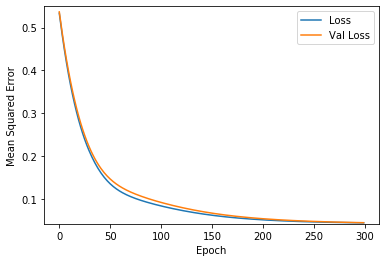

In [155]:
epochs = 300
batch_size = 500
my_model=get_model(x_data_train.shape[1],y_data_train.shape[1])
df_hist,epochs = train_model(my_model, x_data_train,y_data_train, epochs, 
                          batch_size)

df_hist.head()
mse = df_hist["mean_squared_error"].to_numpy()
val_mse = df_hist["val_mean_squared_error"].to_numpy()
print("Final evaluation:", mse[-1], val_mse[-1] )
plot_the_loss_curve(epochs, mse,val_mse)

In [156]:
evaluation=my_model.evaluate(x = x_data_test, y = y_data_test, batch_size=batch_size)
predicted = my_model.predict(x_data_test)
print(evaluation)

df_test=pd.DataFrame(y_data_test,columns=["k6a1_test","k6a2_test","k11_test","k12_test","k9a1_test","k9a2_test"])
df_predict=pd.DataFrame(predicted,columns=["k6a1_hat","k6a2_hat","k11_hat","k12_hat","k9a1_hat","k9a2_hat"])
pd.concat([df_test,df_predict], axis=1).head()

1/1 [==============================] - 0s 1000us/step - loss: 0.0424 - mean_squared_error: 0.0424
[0.042446088045835495, 0.042446088045835495]


,k6a1_test,k6a2_test,k11_test,k12_test,k9a1_test,k9a2_test,k6a1_hat,k6a2_hat,k11_hat,k12_hat,k9a1_hat,k9a2_hat
0,0.25,0.25,0.25,0.25,0.50,0.50,0.402714,0.511183,0.506417,0.475340,0.483286,0.475403
1,0.25,0.25,0.25,0.25,0.75,0.75,0.551619,0.495908,0.499437,0.504692,0.513478,0.513122
2,0.25,0.25,0.25,0.50,0.50,0.50,0.402714,0.511183,0.506417,0.475340,0.483286,0.475403
3,0.25,0.25,0.25,0.50,0.75,0.25,0.402714,0.511183,0.506417,0.475340,0.483286,0.475403
4,0.25,0.25,0.50,0.50,0.50,0.50,0.368351,0.514708,0.508028,0.468567,0.476319,0.466699
